Week 4 Portfolio

Data Preparation

In [1]:
import pandas as pd  
import numpy as np
from sklearn.utils import shuffle 
df = pd.read_csv('vegemite.csv') 
df = shuffle(df)

In [2]:
df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
4792,50.0,43.0,130.00,2609.30,65.0,-79.75,120.0,80.0,10000.0,50.4,...,3083.66,0.0,39.61,1.20,119.91,68.15,45.90,74.0,-69.65,1
12322,50.0,43.0,94.83,2917.67,76.0,-48.79,120.0,80.0,10200.0,50.0,...,2032.43,0.0,64.89,1.00,119.91,75.06,82.50,75.0,-67.54,2
14538,50.0,42.0,110.00,1992.86,71.0,-55.71,120.0,80.0,9300.0,50.0,...,2122.57,0.0,74.90,1.28,119.91,74.67,77.74,74.0,-74.57,2
8871,25.0,43.0,138.83,2991.88,71.0,-50.00,2.0,80.0,14000.0,50.0,...,10907.91,0.0,-4.89,1.08,1.98,54.12,81.46,70.0,1.94,2
13364,50.0,43.0,130.00,2846.51,70.0,-60.24,120.0,80.0,10800.0,50.1,...,1512.97,0.0,-4.31,0.92,119.91,82.93,31.04,83.0,-45.29,2


In [3]:
d_info = df.info() 
d_stats = df.describe() 
d_unique_value = df.nunique() 

d_info, d_stats, d_unique_value

<class 'pandas.core.frame.DataFrame'>
Index: 15237 entries, 4792 to 712
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        15237 non-null  float64
 1   FFTE Production solids SP      15237 non-null  float64
 2   FFTE Steam pressure SP         15237 non-null  float64
 3   TFE Out flow SP                15237 non-null  float64
 4   TFE Production solids SP       15237 non-null  float64
 5   TFE Vacuum pressure SP         15237 non-null  float64
 6   TFE Steam pressure SP          15237 non-null  float64
 7   TFE Steam temperature SP       15237 non-null  float64
 8   FFTE Feed flow SP              15237 non-null  float64
 9   FFTE Out steam temp SP         15237 non-null  float64
 10  Extract tank Level             15237 non-null  float64
 11  Extract tank Out flow PV       15237 non-null  float64
 12  FFTE Discharge density         15237 non-null  flo

(None,
        FFTE Feed tank level SP  FFTE Production solids SP  \
 count             15237.000000               15237.000000   
 mean                 46.660760                  41.834045   
 std                   8.504626                   1.142426   
 min                  25.000000                  39.000000   
 25%                  50.000000                  41.110000   
 50%                  50.000000                  42.000000   
 75%                  50.000000                  43.000000   
 max                  50.000000                  43.000000   
 
        FFTE Steam pressure SP  TFE Out flow SP  TFE Production solids SP  \
 count            15237.000000     15237.000000              15237.000000   
 mean               118.767011      2434.316757                 62.635479   
 std                 17.303951       395.339898                 15.118098   
 min                 60.000000      1687.180000                  0.000000   
 25%                106.000000      2066.670000 

In [4]:
df.isnull().sum()

FFTE Feed tank level SP          0
FFTE Production solids SP        0
FFTE Steam pressure SP           0
TFE Out flow SP                  0
TFE Production solids SP         0
TFE Vacuum pressure SP           0
TFE Steam pressure SP            0
TFE Steam temperature SP         0
FFTE Feed flow SP                0
FFTE Out steam temp SP           0
Extract tank Level               0
Extract tank Out flow PV         0
FFTE Discharge density           0
FFTE Discharge solids            0
FFTE Feed flow rate PV           0
FFTE Feed tank level PV          0
FFTE Heat temperature 1          0
FFTE Heat temperature 2          0
FFTE Heat temperature 3          0
FFTE Out steam temp PV           0
FFTE Production solids PV        0
FFTE Pump 1                      0
FFTE Pump 1 - 2                  0
FFTE Pump 2                      0
FFTE Steam pressure PV           0
FFTE Temperature 1 - 1           0
FFTE Temperature 1 - 2           0
FFTE Temperature 2 - 1           0
FFTE Temperature 2 -

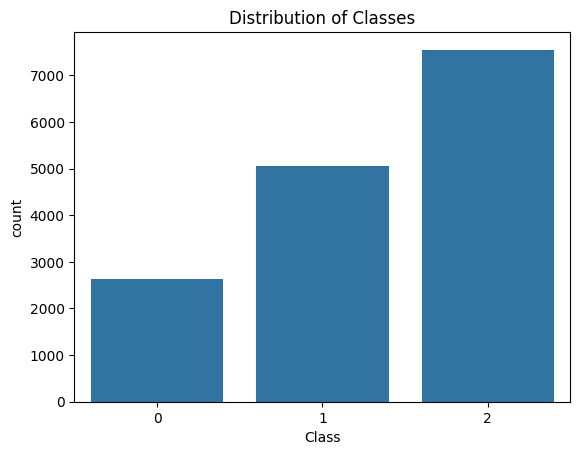

In [5]:
import seaborn as sns  
import matplotlib.pyplot as plt
sns.countplot(x="Class", data=df) 
plt.title('Distribution of Classes') 
plt.show()

Does the class have a balanced distribution? If not, then perform necessary undersampling and oversampling or adjust class weights.  

In [6]:
target_column = df.columns[-1]  
class_counts = df[target_column].value_counts()
print(f"Class distribution:\n{class_counts}")


if min(class_counts) / max(class_counts) < 0.5: 
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_resampled, y_resampled = smote.fit_resample(X, y)
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled[target_column] = y_resampled
    print("Applied SMOTE to balance classes")


Class distribution:
Class
2    7548
1    5047
0    2642
Name: count, dtype: int64
Applied SMOTE to balance classes


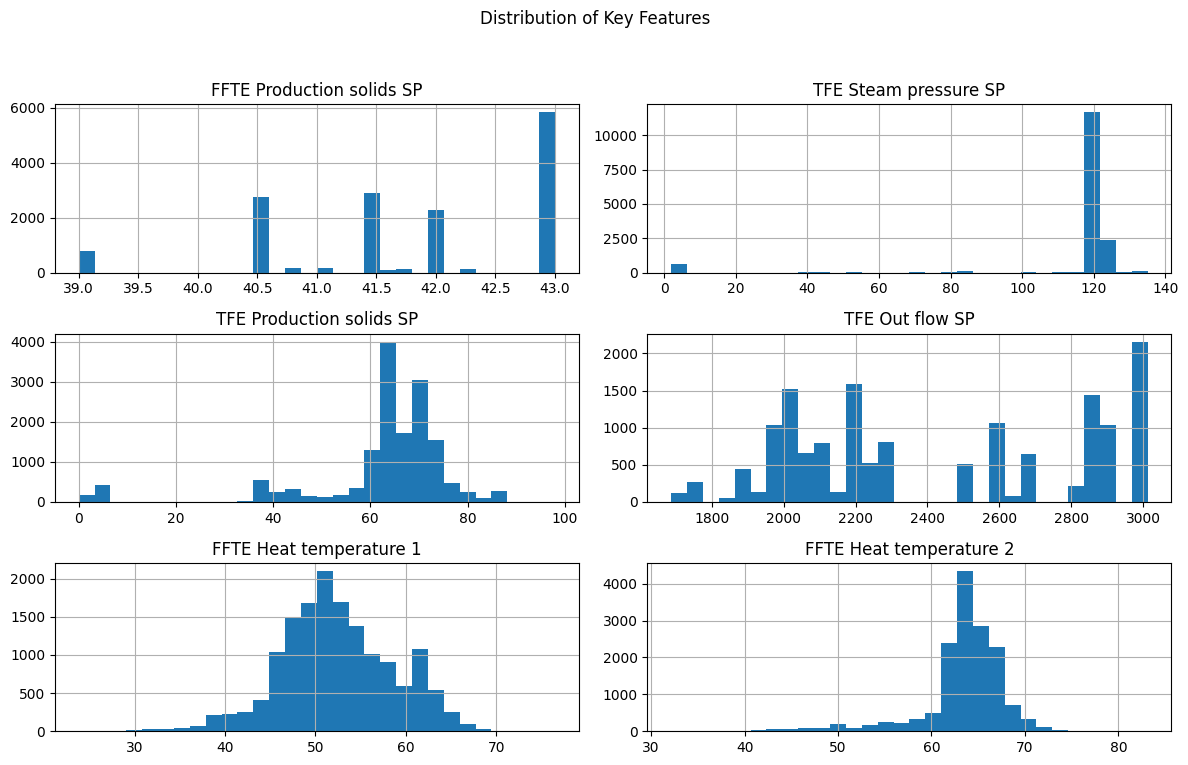

In [7]:
key_features = ['FFTE Production solids SP', 'TFE Steam pressure SP', 'TFE Production solids SP',  
                'TFE Out flow SP', 'FFTE Heat temperature 1', 'FFTE Heat temperature 2'] 
df[key_features].hist(figsize=(12, 8), bins=30, layout=(3, 2)) 
plt.suptitle("Distribution of Key Features")  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() 

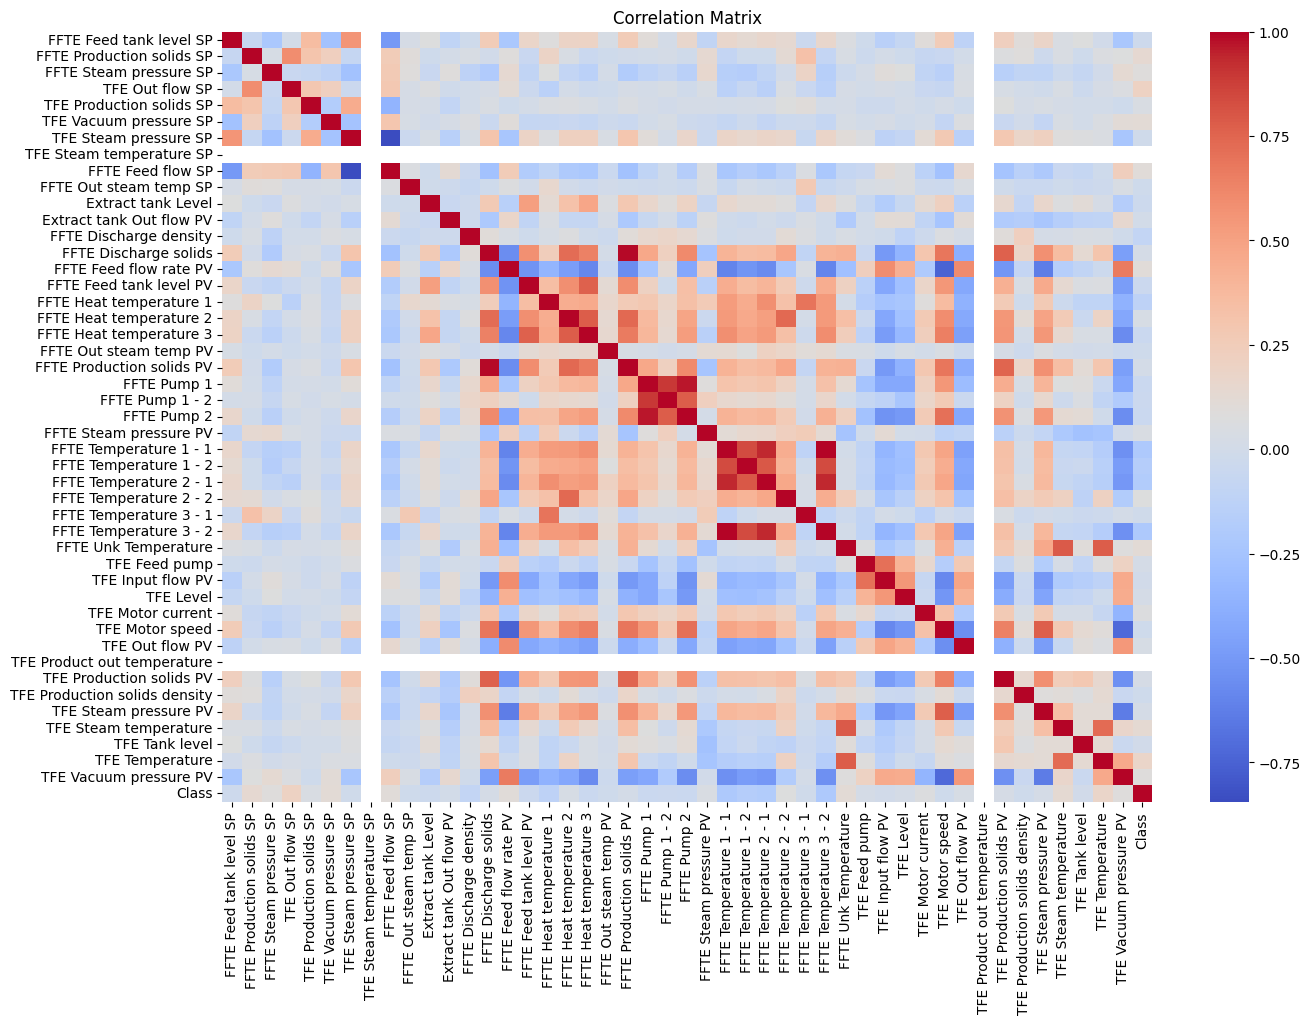

In [8]:
from sklearn.metrics import confusion_matrix 
correlation_matrix = df.corr() 
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()

Does the dataset have a constant column? If yes, then remove it   

In [9]:
df = df.loc[:, df.nunique() > 1]  
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
if constant_columns:
    df = df.drop(columns=constant_columns)
    print(f"Constant columns removed: {constant_columns}")

Does the dataset have any column with few integers’ values?  If yes, then convert them to categorical feature.  

In [10]:
threshold = 10 
 
unique_values_columns = df.nunique()[df.nunique() < threshold] 

print(unique_values_columns)

FFTE Feed tank level SP    3
FFTE Pump 1                5
FFTE Pump 1 - 2            4
FFTE Pump 2                5
TFE Motor speed            3
Class                      3
dtype: int64


In [11]:
for col in unique_values_columns.index: 
    df[col] = df[col].astype('category')  
    
print(df.dtypes)

FFTE Feed tank level SP          category
FFTE Production solids SP         float64
FFTE Steam pressure SP            float64
TFE Out flow SP                   float64
TFE Production solids SP          float64
TFE Vacuum pressure SP            float64
TFE Steam pressure SP             float64
FFTE Feed flow SP                 float64
FFTE Out steam temp SP            float64
Extract tank Level                float64
Extract tank Out flow PV          float64
FFTE Discharge density            float64
FFTE Discharge solids             float64
FFTE Feed flow rate PV            float64
FFTE Feed tank level PV           float64
FFTE Heat temperature 1           float64
FFTE Heat temperature 2           float64
FFTE Heat temperature 3           float64
FFTE Out steam temp PV            float64
FFTE Production solids PV         float64
FFTE Pump 1                      category
FFTE Pump 1 - 2                  category
FFTE Pump 2                      category
FFTE Steam pressure PV            

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
selected_feature = df.columns[df.columns.str.endswith('SP')]
X_train, X_test, y_train, y_test = train_test_split(df[selected_feature], df['Class'], test_size=1000, stratify=df['Class'], random_state=42)

In [13]:
oversampler = SMOTE(sampling_strategy='auto', random_state=42)  

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)  

X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42) 

num_features = X_train_resampled.shape[1] 
print(f"Features in the final dataset: {num_features}")

Features in the final dataset: 9


Feature selection, Model Training & Evaluation

In [14]:
print("Data Shape: ", df.shape)

Data Shape:  (15237, 45)


In [15]:
print("Train Size:" , X_train.shape[0]) 
print("Train Resampled Size: ", X_resampled.shape[0])

Train Size: 14237
Train Resampled Size:  22644


In [16]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer
 
gb_pipeline = Pipeline([ 
                ('imputer', SimpleImputer(strategy='mean')), 
                ('model', GradientBoostingClassifier())
])  

ada_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', AdaBoostClassifier())
])

extra_trees_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', ExtraTreesClassifier())
]) 
 
models = { 
           'Decision Tree' : DecisionTreeClassifier(), 
           'RandomForest' : RandomForestClassifier(),
            'GradientBoosting' : gb_pipeline, 
            'AdaBoost' : ada_pipeline, 
            'Extra-Trees' : extra_trees_pipeline
        } 

results = {}
for name, model in models.items(): 
    print(f"\nTraining and evaluating {name}... ")
    model.fit(X_train_resampled, y_train_resampled)  # Train on the resampled training set
    predictions = model.predict(X_val)  # Evaluate on the original test set
    results[name] = {
        'report': classification_report(y_val, predictions, output_dict=True),
        'conf_matrix': confusion_matrix(y_val, predictions)
    }

# Display results
for name, result in results.items(): 
    print(f"\nModel: {name}")
    print("Classification Report:\n", result['report'])
    print("Confusion Matrix:\n", result['conf_matrix'])


Training and evaluating Decision Tree... 

Training and evaluating RandomForest... 

Training and evaluating GradientBoosting... 

Training and evaluating AdaBoost... 


c:\Users\cucum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training and evaluating Extra-Trees... 

Model: Decision Tree
Classification Report:
 {'0': {'precision': 0.9487544483985765, 'recall': 0.9453900709219858, 'f1-score': 0.9470692717584369, 'support': 1410.0}, '1': {'precision': 0.9315263908701854, 'recall': 0.9255846917080085, 'f1-score': 0.9285460362602204, 'support': 1411.0}, '2': {'precision': 0.9347368421052632, 'recall': 0.9440113394755493, 'f1-score': 0.9393511988716502, 'support': 1411.0}, 'accuracy': 0.9383270321361059, 'macro avg': {'precision': 0.9383392271246751, 'recall': 0.9383287007018478, 'f1-score': 0.9383221689634359, 'support': 4232.0}, 'weighted avg': {'precision': 0.938336766061047, 'recall': 0.9383270321361059, 'f1-score': 0.9383201020676902, 'support': 4232.0}}
Confusion Matrix:
 [[1333   44   33]
 [  45 1306   60]
 [  27   52 1332]]

Model: RandomForest
Classification Report:
 {'0': {'precision': 0.9677881173944166, 'recall': 0.9588652482269504, 'f1-score': 0.9633060206626292, 'support': 1410.0}, '1': {'precision

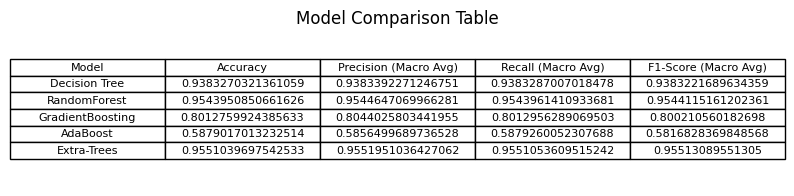

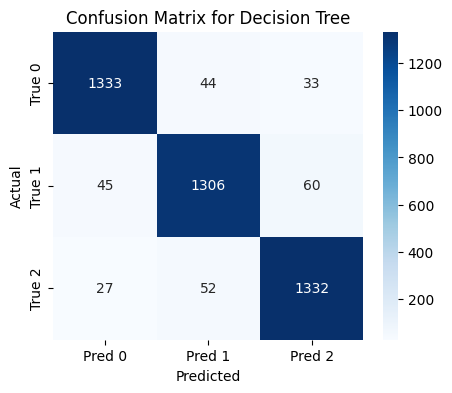

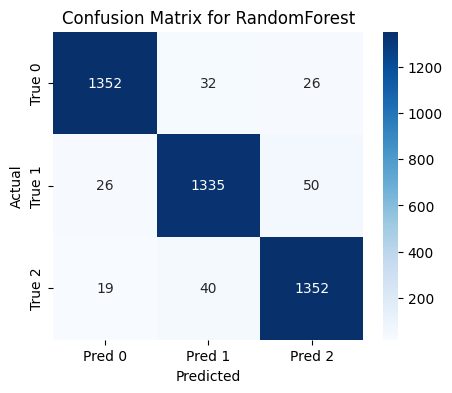

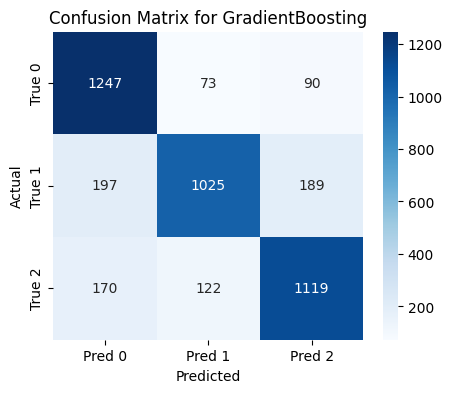

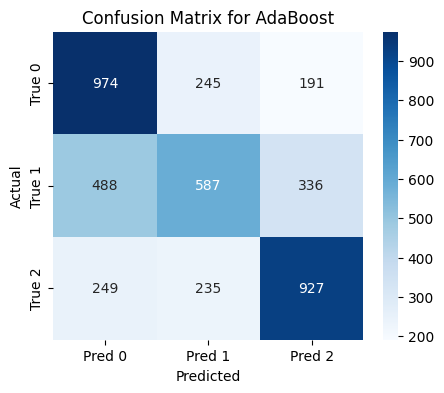

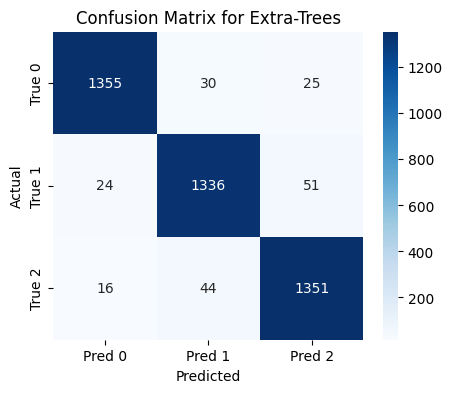

The best model is Extra-Trees with an accuracy of 0.955


In [20]:
model_names = [] 
accuracies = [] 
precisions = [] 
recalls = [] 
f1_scores = [] 
confusion_matrices = [] 

best_model_name = None 
best_model_accuracy = 0 

for model_name, model_results in results.items(): 
    model_names.append(model_name) 
    accuracies.append(model_results['report']['accuracy']) 
    precisions.append(model_results['report']['macro avg']['precision']) 
    recalls.append(model_results['report']['macro avg']['recall']) 
    f1_scores.append(model_results['report']['macro avg']['f1-score']) 
    confusion_matrices.append(model_results['conf_matrix']) 
    
    model_accuracy = model_results['report']['accuracy'] 
    if model_accuracy > best_model_accuracy: 
        best_model_name = model_name 
        best_model_accuracy = model_accuracy 
        
comparison_df = pd.DataFrame({ 
    'Model': model_names, 
    'Accuracy' : accuracies, 
    'Precision (Macro Avg)' : precisions,        
    'Recall (Macro Avg)' : recalls, 
    'F1-Score (Macro Avg)' : f1_scores
}) 

def plot_table(df, title): 
    fig, ax = plt.subplots(figsize=(10, 2)) 
    ax.axis('tight') 
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center') 
    plt.title(title) 
    plt.show() 
    
plot_table(comparison_df, "Model Comparison Table") 

def plot_confusion_matrix(cm, model_name): 
    plt.figure(figsize=(5,4)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1', 'Pred 2'], yticklabels=['True 0', 'True 1', 'True 2']) 
    plt.title(f"Confusion Matrix for {model_name}") 
    plt.ylabel('Actual') 
    plt.xlabel('Predicted') 
    plt.show() 
    
for model_name, conf_matrix in zip(model_names, confusion_matrices): 
    plot_confusion_matrix(conf_matrix, model_name) 

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.3f}")

ML to AI

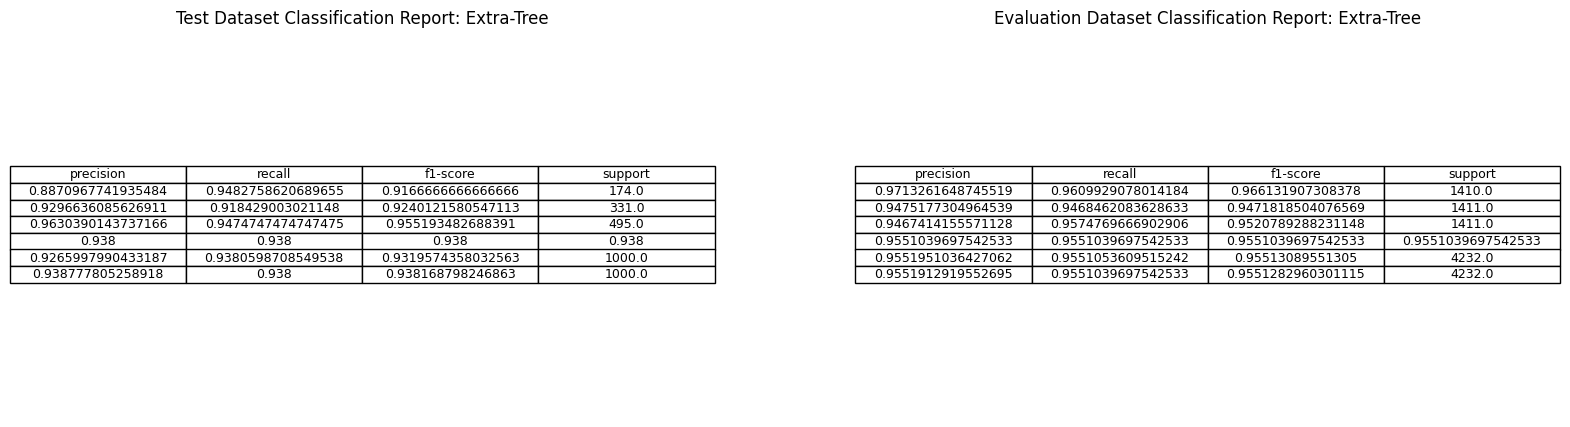

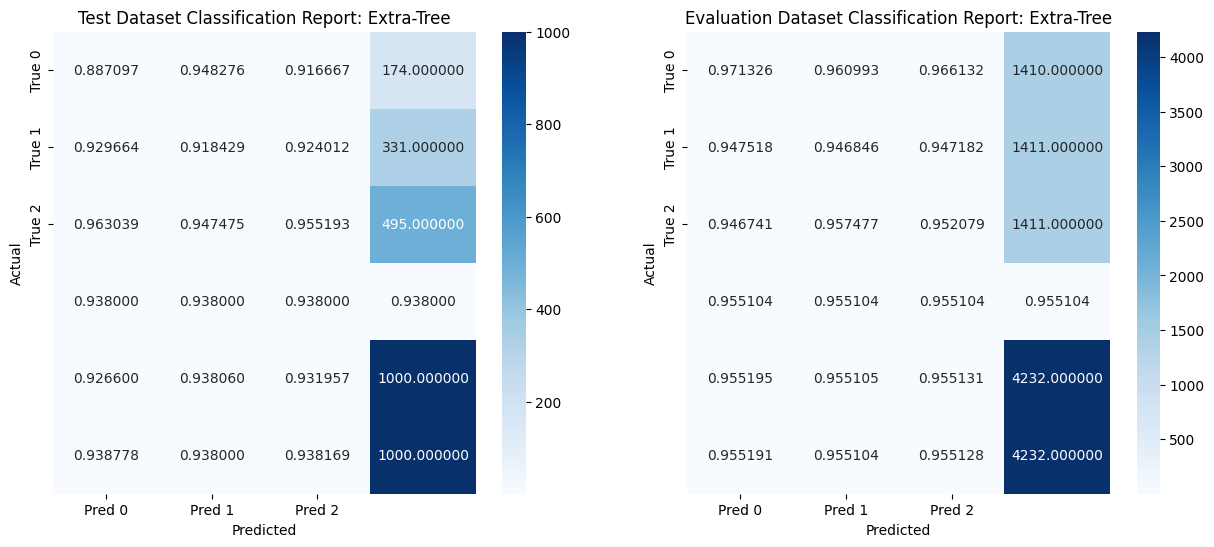

In [30]:
et_test_predictions = models['Extra-Trees'].predict(X_test) 
et_test_report = classification_report(y_test, et_test_predictions, output_dict=True) 
et_test_matrix = confusion_matrix(y_test, et_test_predictions) 

et_eval_predictions = models['Extra-Trees'].predict(X_val) 
et_eval_report = classification_report(y_val, et_eval_predictions, output_dict=True) 
et_eval_matrix = confusion_matrix(y_val, et_eval_predictions) 

et_test_report_df = pd.DataFrame(et_test_report).transpose() 
et_eval_report_df = pd.DataFrame(et_eval_report).transpose() 

def plot_comparison_table(df1, df2, title1, title2): 
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # set size frame
    axes[0].axis('tight')
    axes[0].axis('off')
    axes[0].table(cellText=df1.values, colLabels=df1.columns, cellLoc='center', loc='center')
    axes[0].set_title(title1) 
    
    axes[1].axis('tight')
    axes[1].axis('off')
    axes[1].table(cellText=df2.values, colLabels=df2.columns, cellLoc='center', loc='center')
    axes[1].set_title(title2) 
    
    plt.show() 
    
def plot_confusion_matrices(cm1, cm2, title1, title2): 
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  
    
    sns.heatmap(cm1, annot=True, fmt="f", cmap="Blues", xticklabels=['Pred 0', 'Pred 1', 'Pred 2'], yticklabels=['True 0', 'True 1', 'True 2'], ax=axes[0]) 
    axes[0].set_title(title1)  
    axes[0].set_ylabel('Actual') 
    axes[0].set_xlabel('Predicted') 
     
    sns.heatmap(cm2, annot=True, fmt="f", cmap="Blues", xticklabels=['Pred 0', 'Pred 1', 'Pred 2'], yticklabels=['True 0', 'True 1', 'True 2'], ax=axes[1]) 
    axes[1].set_title(title2)  
    axes[1].set_ylabel('Actual') 
    axes[1].set_xlabel('Predicted')   
    
    plt.show() 
    
plot_comparison_table(et_test_report_df, et_eval_report_df, "Test Dataset Classification Report: Extra-Tree", "Evaluation Dataset Classification Report: Extra-Tree") 

plot_confusion_matrices(et_test_report_df, et_eval_report_df, "Test Dataset Classification Report: Extra-Tree", "Evaluation Dataset Classification Report: Extra-Tree")

Develop rules from the ML model

In [31]:
from sklearn.tree import export_text 
sp_features = [col for col in df.columns if col.endswith('SP')] 
X_sp = df[sp_features] 
y_sp= df['Class'] 

decisiontree_sp = DecisionTreeClassifier(random_state=42) 
decisiontree_sp.fit(X_sp, y_sp) 

tree_rules = export_text(decisiontree_sp, feature_names=sp_features) 
print(tree_rules)

|--- TFE Out flow SP <= 2249.11
|   |--- FFTE Steam pressure SP <= 119.98
|   |   |--- TFE Out flow SP <= 2100.70
|   |   |   |--- TFE Vacuum pressure SP <= -67.99
|   |   |   |   |--- FFTE Feed flow SP <= 9395.00
|   |   |   |   |   |--- TFE Production solids SP <= 64.25
|   |   |   |   |   |   |--- FFTE Steam pressure SP <= 103.50
|   |   |   |   |   |   |   |--- FFTE Steam pressure SP <= 94.00
|   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 52.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- TFE Production solids SP >  52.75
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 60.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP >  60.00
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP <= -76.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP 